In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [ ]:
data = pd.read_csv("/content/005 1.01.Simple-linear-regression.csv")

In [ ]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


from matplotlib import pyplot as plt
data['SAT'].plot(kind='hist', bins=20, title='SAT')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['GPA'].plot(kind='hist', bins=20, title='GPA')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='SAT', y='GPA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['GPA']
  ys = series['SAT']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('GPA', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('GPA')
_ = plt.ylabel('SAT')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['GPA']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'GPA'}, axis=1)
              .sort_values('GPA', ascending=True))
  xs = counted['GPA']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('GPA', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('GPA')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
data['SAT'].plot(kind='line', figsize=(8, 4), title='SAT')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['GPA'].plot(kind='line', figsize=(8, 4), title='GPA')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [ ]:
y = data['GPA']
x1 = data['SAT']

In [ ]:
y

0     2.40
1     2.52
2     2.54
3     2.74
4     2.83
      ... 
79    3.71
80    3.71
81    3.73
82    3.76
83    3.81
Name: GPA, Length: 84, dtype: float64

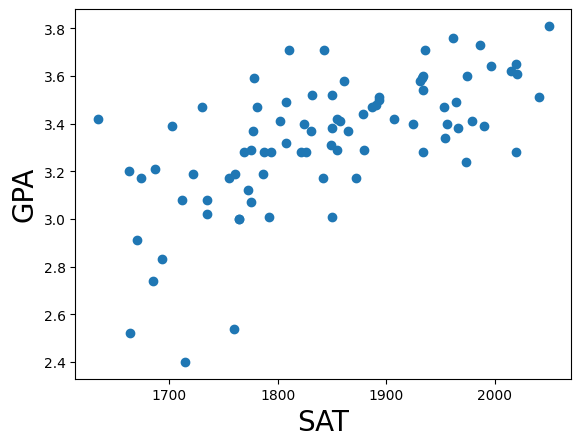

In [ ]:
plt.scatter(x1,y)
plt.xlabel('SAT',fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

Regression

Ordinary least squares (OLS) regression is a method that allows us to find a line that best describes the relationship between one or more predictor variables and a response variable. This method allows us to find the following equation: ŷ = b0 + b1x.

add_constant(X) function, which adds a column of constants to the X dataframe, before passing that into the OLS() function

In [ ]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           7.20e-11
Time:                        05:33:57   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the coef column we can see the regression coefficients

In [ ]:
yhat = 0.0017*x1 + 0.2750

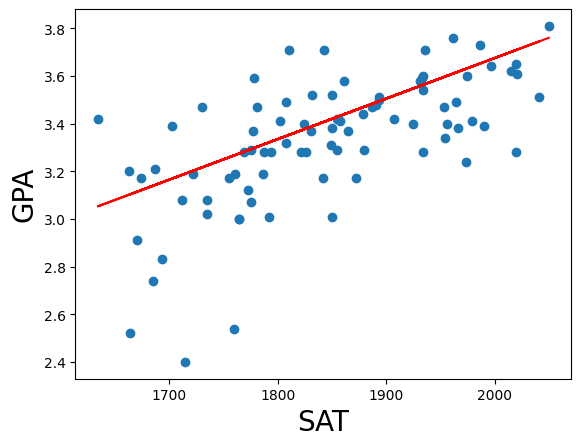

In [ ]:
plt.scatter(x1,y)
plt.xlabel('SAT',fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.plot(x1,yhat,color = 'red')
plt.show()